## Generate masks for images

In [1]:
import os

from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

import dotenv
dotenv.load_dotenv(dotenv.find_dotenv());

In [160]:
def apply_mask(mask_arr, original_arr):
    applied = np.empty_like(original_arr)
    for i in range(original_arr.shape[0]):
        for j in range(original_arr.shape[1]):
            if np.array_equal(mask_arr[i, j], np.array([1., 0., 1.])):
                applied[i, j] = mask_arr[i, j]
            else:
                applied[i, j] = original_arr[i, j]
    return applied

## Mask with text

In [9]:
LOREM_IPSUM = 'Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.'

In [17]:
def pick_random_words(n_word=5, text=LOREM_IPSUM):
    splited_lorem = LOREM_IPSUM.split()
    idx = np.random.randint(0, len(splited_lorem), n_word)
    return ' '.join([splited_lorem[i] for i in idx])

In [34]:
def rotate_image(img):
    rotation = np.random.choice([0, 90, 180, 270])
    return img.rotate(rotation)

In [222]:
def write_random(img):
    fnt_size = 40
    fnt = ImageFont.truetype(os.environ['FONT'], fnt_size)
    d = ImageDraw.Draw(img)
    
    curr_pos = 5
    while curr_pos < img.size[1]:
        if np.random.random() > .5:
            d.text((10, curr_pos), pick_random_words(), font=fnt, fill=(255, 0, 255))
        curr_pos += fnt_size + 10

In [220]:
def generate_text_mask(original):
    mask = Image.new('RGB', (515, 512), color = (255, 255, 255))
    write_random(mask)
    mask = rotate_image(mask)
    return apply_mask(np.asarray(mask) / 255., np.asarray(original) / 255.)

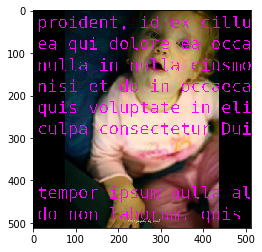

In [223]:
original = Image.open('../data/processed/image_net/resized/0/0.jpg')
masked = generate_text_mask(original)
plt.imshow(masked)

## Mask with droped_pixels

In [166]:
def drop_pixels(original):
    mask_arr = np.ones(original.shape)
    rate = np.random.choice(np.arange(.1, .5, .1))

    random_mask = np.random.random(size=original.shape)
    random_idx = random_mask <= rate
    
    mask_arr[random_idx[:, :, 0]] = np.array([1., 0., 1.])
    return apply_mask(mask_arr, original)

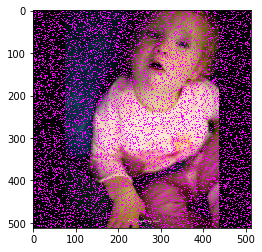

In [167]:
img = drop_pixels(np.asarray(original) / 255.)
plt.imshow(img)

## Mask with vertical and horizontal lines

In [212]:
def generate_lines_mask(original, min_width=2, max_width=4):
    line_width = np.random.randint(min_width - 1, max_width + 1)
    n_vertical_lines = np.random.randint(3, 9)
    n_horizontal_lines = np.random.randint(3, 9)
    
    mask = Image.new('RGB', (515, 512), color = (255, 255, 255))
    
    hozizontal_lines_pos = np.random.randint(0, original.size[1], size=(n_horizontal_lines, 2))    
    hozizontal_lines_len = np.random.randint(original.size[1] // 1.5, original.size[1], size=(n_horizontal_lines))
    
    vertical_lines_pos = np.random.randint(0, original.size[1], size=(n_vertical_lines, 2))    
    vertical_lines_len = np.random.randint(original.size[1] // 1.5, original.size[1], size=(n_vertical_lines))

    d = ImageDraw.Draw(mask)
    for i in range(n_horizontal_lines):
        d.line((hozizontal_lines_pos[i][0], 
                hozizontal_lines_pos[i][1], 
                hozizontal_lines_pos[i][0] + hozizontal_lines_len[i], 
                hozizontal_lines_pos[i][1]), 
               fill=(255, 0, 255), width=line_width)
    
    for i in range(n_vertical_lines):
        d.line((vertical_lines_pos[i][0], 
                vertical_lines_pos[i][1], 
                vertical_lines_pos[i][0], 
                vertical_lines_pos[i][1] + vertical_lines_len[i]), 
               fill=(255, 0, 255), width=line_width)
    
    plt.imshow(mask)

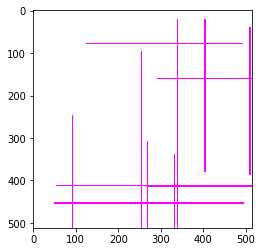

In [218]:
generate_lines_mask(original)